In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Add the scripts folder to the Python path
sys.path.append(os.path.abspath("../scripts"))

In [2]:
#Import the functions from the scripts
from data_cleaning import  detect_outliers, check_missing_values,remove_outliers
from visualizations import plot_boxplot,plot_categorical_distribution,plot_scatter

In [3]:

# Define file path
file_path = r'D:\Kifya_training\Week 3\Week 3\AlphaCare-Insurance-Analysis\notebooks\data\cleaned_data.csv'

# Load data using the custom function
data = pd.read_csv(file_path )

# Display the first few rows of the data
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [4]:
# Get general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      1000098 non-null  object 
 9   AccountType               1000098 non-null  object 
 10  MaritalStatus             1000098 non-null  object 
 11  Gender                    1000098 non-null  object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [5]:
data.shape

(1000098, 52)

In [6]:
# Summary statistics for numeric columns
summary_stats = data.describe()

# Display the summary statistics
print(summary_stats)


       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  1.000098e+06   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360005e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear     Cylinders  cubiccapacity     kilowatts  \
count      1.000098e+06  1.000098e+06   1.000098e+06  1.000098e+06   
mean       2.010225e+03  4.046642e+00   2.466743e+03  9.720792e+01   
std        3.261391e+00  2.939390e-01   4.426784e+02  1.938790e+01   
min        1.987000e+03  0.000000e+00   0.000000e+00  0.000000e+00   
2

In [7]:

# Check for missing values
missing_values = check_missing_values(data)
print("Missing Values in Data:")
print(missing_values)



Missing Values in Data:
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                            0
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                         0
cubiccapacity                     0
kilowatts                         0
bodytype                          0
Numb

In [8]:
# Detect outliers in 'TotalClaims' and 'TotalPremium'
outliers_claims = detect_outliers(data, 'TotalClaims')
outliers_premium = detect_outliers(data, 'TotalPremium')
# Display the outliers
print("Outliers in TotalClaims:")
print(outliers_claims)
print("\nOutliers in TotalPremium:")
print(outliers_premium)




Outliers in TotalClaims:
        UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
203                   46222      4044       2014-10-01            False   
284                   82062      7174       2015-03-01             True   
1560                 119591      8672       2015-04-01            False   
1779                  50193       283       2014-10-01            False   
1943                 119582      8672       2015-04-01            False   
...                     ...       ...              ...              ...   
998512               263942       962       2015-07-01            False   
998848                  937       138       2014-08-01            False   
999218                 3255       394       2014-05-01            False   
999701               238713     20611       2015-07-01            False   
999923                15310       361       2014-06-01            False   

       Citizenship          LegalType Title Language                 Bank 

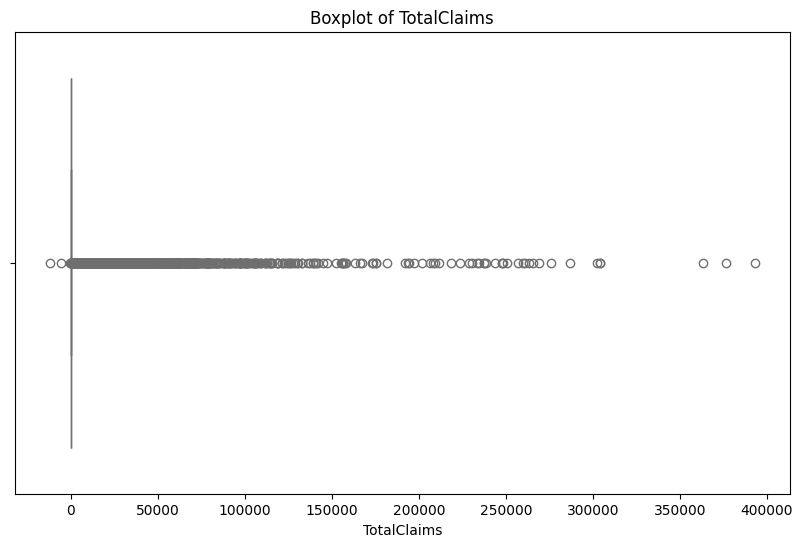

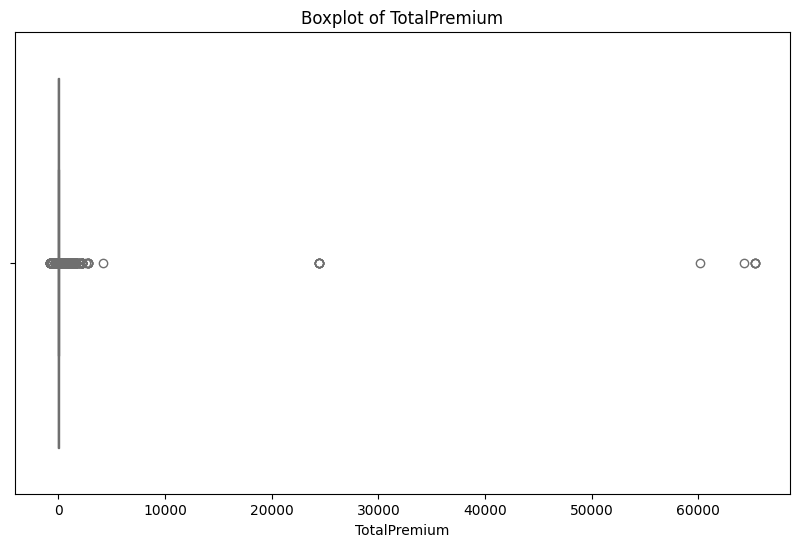

In [9]:
# Visualize outliers using box plots
plot_boxplot(data, 'TotalClaims')
plot_boxplot(data, 'TotalPremium')


In [10]:
# Handle outliers by removing them
cleaned_data_claims = remove_outliers(data, 'TotalClaims')
cleaned_data_premium = remove_outliers(data, 'TotalPremium')


Visualizing cleaned data (after removing outliers):


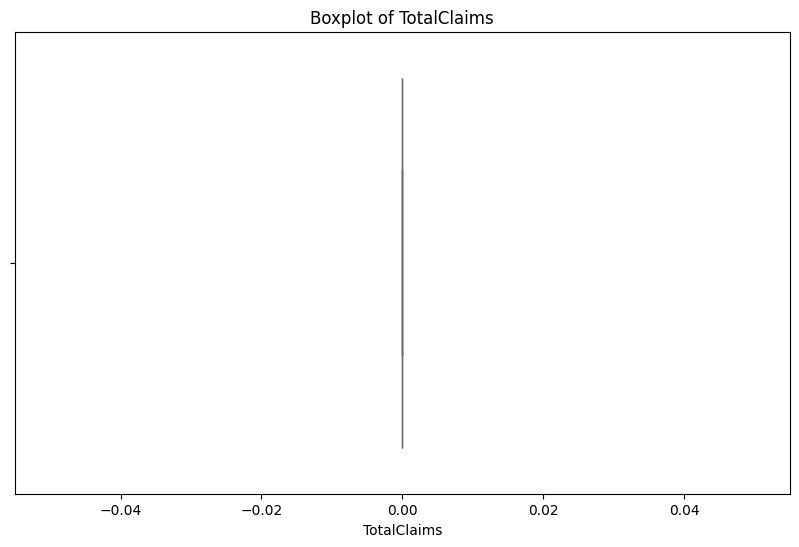

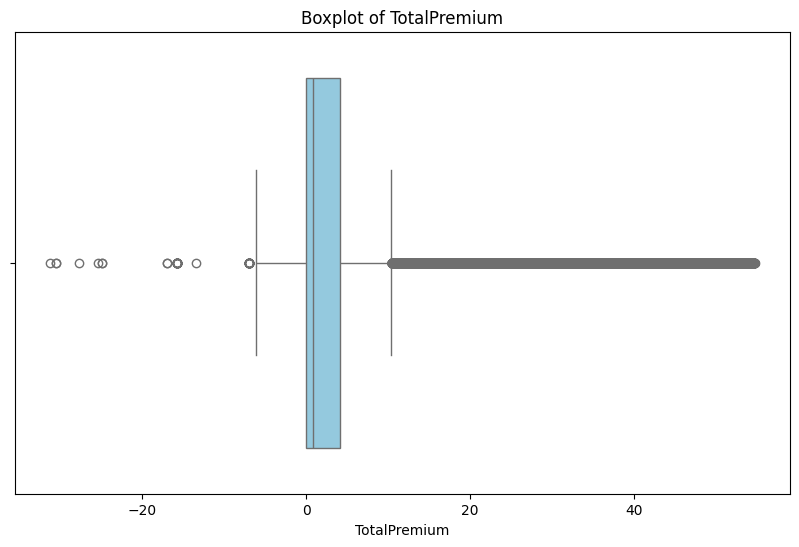

In [11]:
# Visualize the cleaned data
print("\nVisualizing cleaned data (after removing outliers):")
plot_boxplot(cleaned_data_claims, 'TotalClaims')
plot_boxplot(cleaned_data_premium, 'TotalPremium')

d:\Kifya_training\Week 3\Week 3\AlphaCare-Insurance-Analysis\scripts\visualizations.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette="Set2")


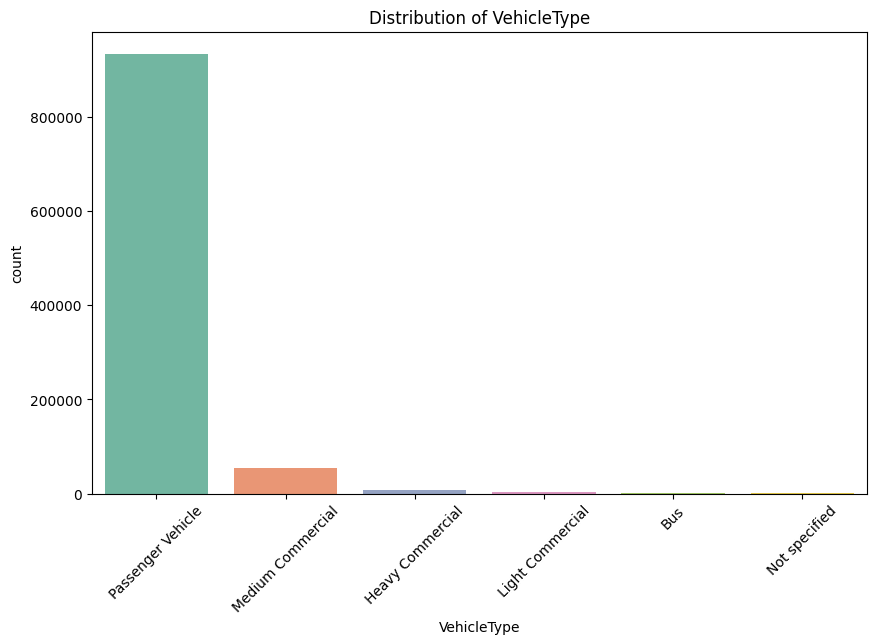

In [16]:
#univeriate analysis 
#visualize the distribution of the 'VehicleType' columen 
plot_categorical_distribution(data, 'VehicleType')

d:\Kifya_training\Week 3\Week 3\AlphaCare-Insurance-Analysis\scripts\visualizations.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette="Set2")


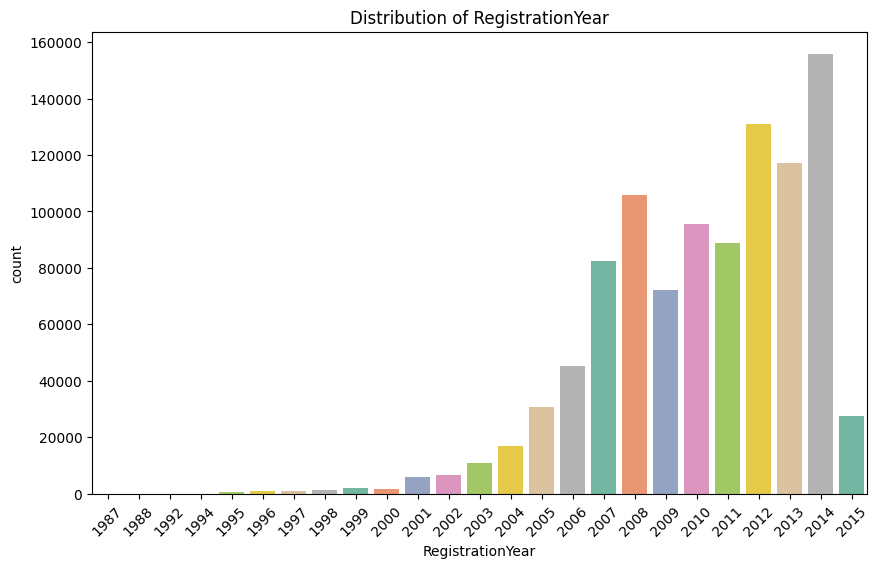

In [18]:
#visualize the distribution of the 'VehicleType' columen 
plot_categorical_distribution(data, 'RegistrationYear')

d:\Kifya_training\Week 3\Week 3\AlphaCare-Insurance-Analysis\scripts\visualizations.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column_name, palette="Set2")


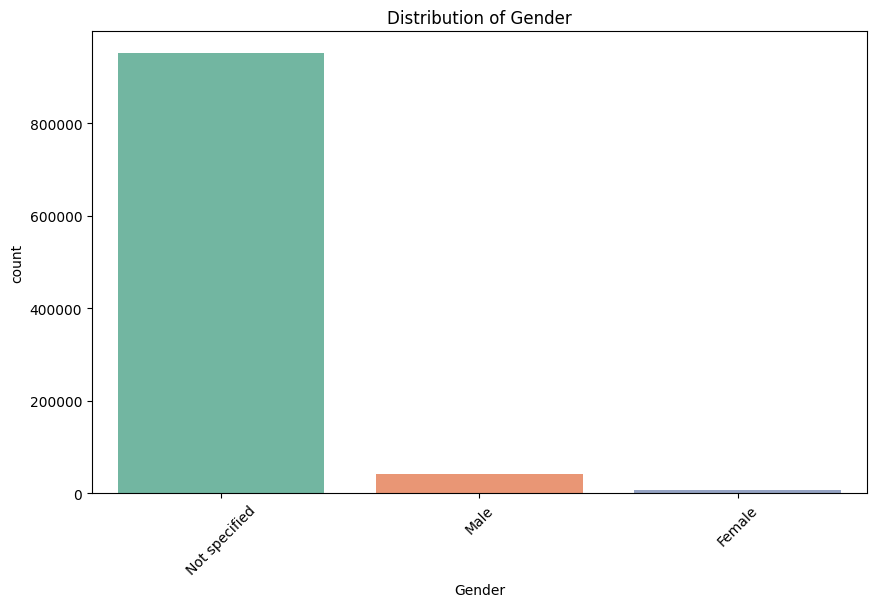

In [19]:
#visualize the distribution of the 'VehicleType' columen 
plot_categorical_distribution(data, 'Gender')

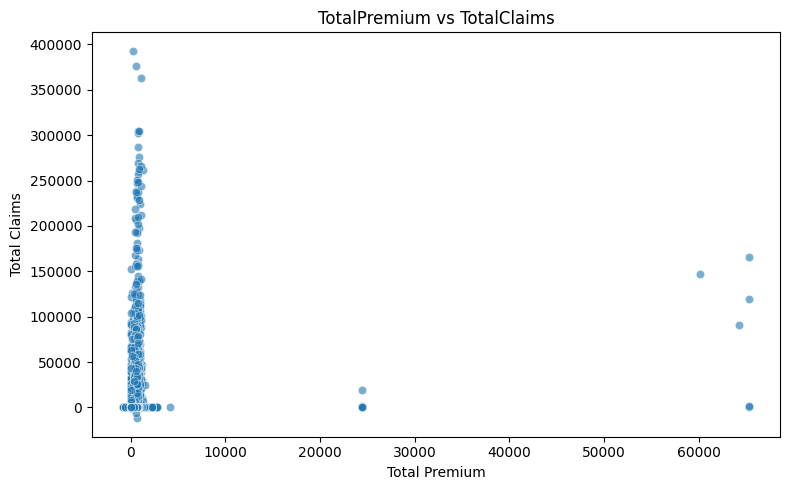

In [4]:
#Plotting a scatter plot between 'TotalPremium' and 'TotalClaims'
plot_scatter(data, 'TotalPremium', 'TotalClaims', 'TotalPremium vs TotalClaims', 'Total Premium', 'Total Claims')